## Deep Learning<a class="tocSkip">
## EL460 ELECTIVA I - CIENCIA DE DATOS II <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
**joseiglesias@unicesar.edu.co**

# 2.2 - El Perceptron Multicapas

## Classifying Fashion-MNIST

You will have to create a classification model for the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) dataset, a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network.

In [1]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Let's see a random sample

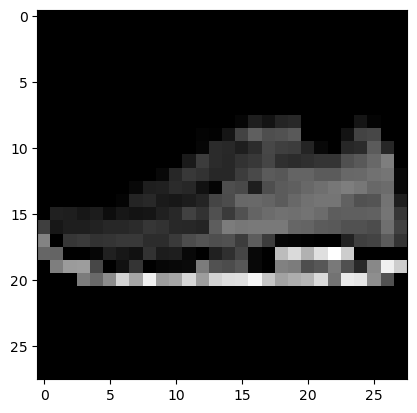

In [4]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[0],:,:], cmap='gray');

Preparing the data for a training process...

In [5]:
from tensorflow.keras import utils 
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

## Define the network architecture using keras

### Sequential models

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

or

In [7]:
del model
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

**Assignment**: Take a look to the core layers in keras: https://keras.io/layers/core/ and the set of basic parameters https://keras.io/layers/about-keras-layers/

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Once the arquictecture of model has been defined, the next step is to set the loss function and optimizer

In [9]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='sgd')

from tensorflow.keras import optimizers
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Remember the definition of cross entropy:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)$$

The categorical cross entropy can be defined as:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} \log p_{model}[y_i \in C_j]$$

The term ${\bf{1}}_{y_i \in C_j}$ is the indicator function of the $i$-th observation belonging to the $j$-th category. The $p_{model}[y_i \in C_j]$ is the probability predicted by the model for the $i$-th observation to belong to the $j$-th category. When there are more than two categories, the neural network outputs a vector of $C$ probabilities, each giving the probability that the network input should be classified as belonging to the respective category. When the number of categories is just two, the neural network outputs a single probability $\hat{y}_i$, with the other one being $1$ minus the output. This is why the binary cross entropy looks a bit different from categorical cross entropy, despite being a special case of it. 

**Note**. If insteat of a multi-class problem we would be facing a multi-label classification problem, the activation function of the last layer must be a **sigmoid** and the loss function **binary_crossentropy**.

Take a look to compile and fit parameters https://keras.io/models/model/#compile

In [10]:
print("Training...")
model.train_on_batch(X_trainN, y_trainOHE)

print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)

Training...
Generating test predictions...


real class
9


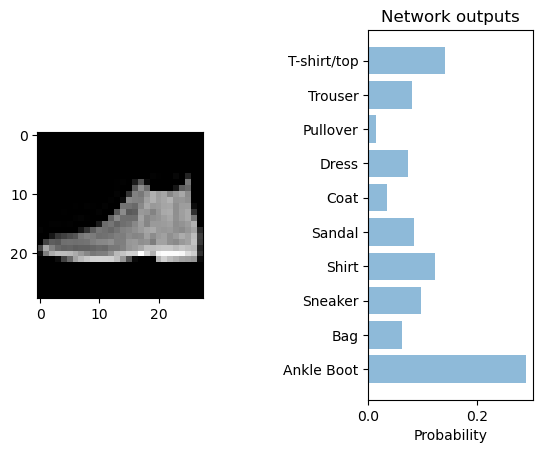

In [11]:
print('real class')
print(y_test[0])

objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122) 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

In [12]:
print("Training...")
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Training...
Epoch 1/10
3375/3375 - 6s - loss: 0.4590 - val_loss: 0.4067 - 6s/epoch - 2ms/step
Epoch 2/10
3375/3375 - 5s - loss: 0.3723 - val_loss: 0.3824 - 5s/epoch - 2ms/step
Epoch 3/10
3375/3375 - 5s - loss: 0.3392 - val_loss: 0.3708 - 5s/epoch - 2ms/step
Epoch 4/10
3375/3375 - 5s - loss: 0.3185 - val_loss: 0.3576 - 5s/epoch - 1ms/step
Epoch 5/10
3375/3375 - 5s - loss: 0.3008 - val_loss: 0.3540 - 5s/epoch - 2ms/step
Epoch 6/10
3375/3375 - 5s - loss: 0.2872 - val_loss: 0.3588 - 5s/epoch - 2ms/step
Epoch 7/10
3375/3375 - 5s - loss: 0.2748 - val_loss: 0.3558 - 5s/epoch - 2ms/step
Epoch 8/10
3375/3375 - 6s - loss: 0.2659 - val_loss: 0.3566 - 6s/epoch - 2ms/step
Epoch 9/10
3375/3375 - 6s - loss: 0.2567 - val_loss: 0.3607 - 6s/epoch - 2ms/step
Epoch 10/10
3375/3375 - 5s - loss: 0.2468 - val_loss: 0.3597 - 5s/epoch - 2ms/step


Generating test predictions...


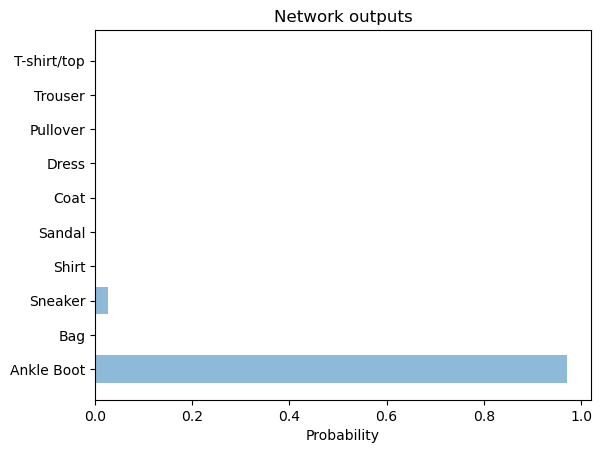

In [13]:
print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
 
plt.show()

In [14]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

313/313 [==============================] - 0s 1ms/step
Accuracy =  86.9 %


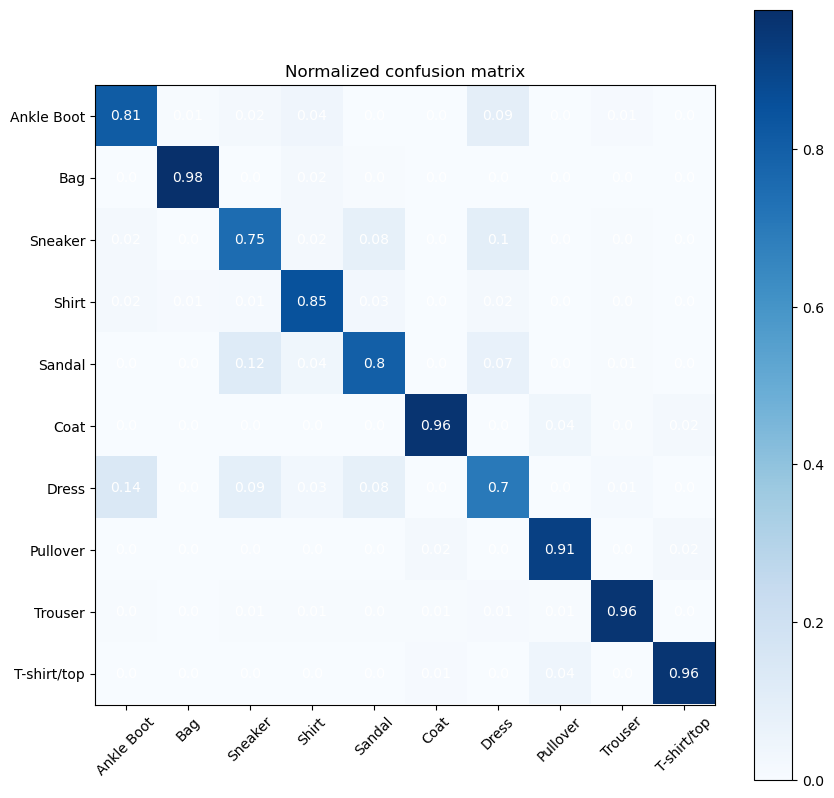

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm = cm/np.sum(cm,axis=0)
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);

### Functional models

The Keras functional API provides a more flexible way for defining models.

It allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

In [16]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 6s - loss: 0.5482 - accuracy: 0.8171 - val_loss: 0.4235 - val_accuracy: 0.8433 - 6s/epoch - 2ms/step
Epoch 2/10
3375/3375 - 4s - loss: 0.3902 - accuracy: 0.8636 - val_loss: 0.3801 - val_accuracy: 0.8650 - 4s/epoch - 1ms/step
Epoch 3/10
3375/3375 - 4s - loss: 0.3507 - accuracy: 0.8760 - val_loss: 0.3536 - val_accuracy: 0.8725 - 4s/epoch - 1ms/step
Epoch 4/10
3375/3375 - 4s - loss: 0.3244 - accuracy: 0.8848 - val_loss: 0.3504 - val_accuracy: 0.8685 - 4s/epoch - 1ms/step
Epoch 5/10
3375/3375 - 4s - loss: 0.3042 - accuracy: 0.8920 - val_loss: 0.3392 - val_accuracy: 0.8788 - 4s/epoch - 1ms/step
Epoch 6/10
3375/3375 - 4s - loss: 0.2874 - accuracy: 0.8988 - val_loss: 0.3341 - val_accuracy: 0.8785 - 4s/epoch - 1ms/step
Epoch 7/10
3375/3375 - 5s - loss: 0.2729 - accuracy: 0.9040 - val_loss: 0.3366 - val_accuracy: 0.8775 - 5s/epoch - 1ms/step
Epoch 8/10
3375/3375 - 4s - loss: 0.2607 - accuracy: 0.9063 - val_loss: 0.3290 - val_accuracy: 0.8823 - 4s/epoch - 1ms/step
Epoch 9/

In [19]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

313/313 [==============================] - 0s 1ms/step
Accuracy =  86.92999999999999 %


**Note**. Take a look to the keras functional API available on https://keras.io/getting-started/functional-api-guide/

### Defining a model by subclassing the Model class
In this way we use inherintance from class Model to define the nwe model. It requires two methods the constructor init, where you should define your layers, and the forward pass in call.

In [20]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh)
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

model = MyModel()

In [21]:
import tensorflow as tf

class MyModel2(tf.keras.Model):
    def __init__(self):
        super(MyModel2, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh)
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)
        self.dropout = tf.keras.layers.Dropout(0.5)
        
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        if training:
            x = self.dropout(x, training=training)
        return self.dense3(x)

model2 = MyModel2()

In [22]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
tf.keras.backend.set_floatx('float32')
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 6s - loss: 0.5691 - accuracy: 0.8115 - val_loss: 0.4263 - val_accuracy: 0.8480 - 6s/epoch - 2ms/step
Epoch 2/10
3375/3375 - 4s - loss: 0.3944 - accuracy: 0.8609 - val_loss: 0.3808 - val_accuracy: 0.8642 - 4s/epoch - 1ms/step
Epoch 3/10
3375/3375 - 4s - loss: 0.3505 - accuracy: 0.8772 - val_loss: 0.3619 - val_accuracy: 0.8680 - 4s/epoch - 1ms/step
Epoch 4/10
3375/3375 - 4s - loss: 0.3229 - accuracy: 0.8863 - val_loss: 0.3552 - val_accuracy: 0.8683 - 4s/epoch - 1ms/step
Epoch 5/10
3375/3375 - 5s - loss: 0.3028 - accuracy: 0.8928 - val_loss: 0.3436 - val_accuracy: 0.8728 - 5s/epoch - 2ms/step
Epoch 6/10
3375/3375 - 5s - loss: 0.2860 - accuracy: 0.8994 - val_loss: 0.3418 - val_accuracy: 0.8760 - 5s/epoch - 1ms/step
Epoch 7/10
3375/3375 - 5s - loss: 0.2718 - accuracy: 0.9029 - val_loss: 0.3396 - val_accuracy: 0.8778 - 5s/epoch - 1ms/step
Epoch 8/10
3375/3375 - 5s - loss: 0.2591 - accuracy: 0.9077 - val_loss: 0.3410 - val_accuracy: 0.8777 - 5s/epoch - 1ms/step
Epoch 9/

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).